In [17]:
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import spatial

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances

In [47]:
doc0 = """World War II (often abbreviated to WWII or WW2), also known as the Second World War, was a global war that lasted from 1939 to 1945. The vast majority of the world's countries—including all the great powers—eventually formed two opposing military alliances: the Allies and the Axis. A state of total war emerged, directly involving more than 100 million people from over 30 countries. The major participants threw their entire economic, industrial, and scientific capabilities behind the war effort, blurring the distinction between civilian and military resources. World War II was the deadliest conflict in human history, marked by 50 to 85 million fatalities, most of whom were civilians in the Soviet Union and China. It included massacres, the genocide of the Holocaust, strategic bombing, premeditated death from starvation and disease, and the only use of nuclear weapons in war"""

In [48]:
doc1 = """A world war is a large-scale war involving many of the countries of the world or many of the most powerful and populous ones. World wars span multiple countries on multiple continents, with battles fought in many theaters. While a variety of global conflicts have been subjectively deemed "world wars", such as the Cold War and the War on Terror, the term is widely and generally accepted only as it is retrospectively applied to two major international conflicts that occurred during the 20th century: World War I (1914–1918) and World War II (1939–1945)."""

In [49]:
doc2 = """Baseball is a bat-and-ball game played between two opposing teams who take turns batting and fielding. The game proceeds when a player on the fielding team, called the pitcher, throws a ball which a player on the batting team tries to hit with a bat. The objectives of the offensive team (batting team) are to hit the ball into the field of play, and to run the bases—having its runners advance counter-clockwise around four bases to score what are called "runs". The objective of the defensive team (fielding team) is to prevent batters from becoming runners, and to prevent runners' advance around the bases.[2] A run is scored when a runner legally advances around the bases in order and touches home plate (the place where the player started as a batter). The team that scores the most runs by the end of the game is the winner."""

In [50]:
doc3 = """Basketball is a team sport in which two teams of five players, opposing one another on a rectangular court, compete with the primary objective of shooting a basketball (approximately 9.4 inches (24 cm) in diameter) through the defender's hoop (a basket 18 inches (46 cm) in diameter mounted 10 feet (3.048 m) high to a backboard at each end of the court) while preventing the opposing team from shooting through their own hoop. A field goal is worth two points, unless made from behind the three-point line, when it is worth three. After a foul, timed play stops and the player fouled or designated to shoot a technical foul is given one or more one-point free throws. The team with the most points at the end of the game wins, but if regulation play expires with the score tied, an additional period of play (overtime) is mandated."""

In [51]:
doc4 = """Football is a family of team sports that involve, to varying degrees, kicking a ball with a foot to score a goal. Unqualified, the word football is understood to refer to whichever form of football is the most popular in the regional context in which the word appears. Sports commonly called football in certain places include association football (known as soccer in some countries); gridiron football (specifically American football or Canadian football); Australian rules football; rugby football (either rugby league or rugby union); and Gaelic football.[1][2] These different variations of football are known as football codes."""

In [52]:
docs = [doc0,
        doc1,
        doc2,
        doc3,
        doc4]

## Count Vectorizer
<li> eliminate stop words : stop_words="english"
<li> ngram (1,1) 
<li> max_features = 10

In [53]:
vect = CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=20)
X = vect.fit_transform(docs)

## Create a DataFrame based on the documents

In [54]:
count_df = DataFrame(X.A, columns=vect.get_feature_names())
print (count_df)

   ball  bases  batting  called  countries  end  fielding  football  game  ii  \
0     0      0        0       0          2    0         0         0     0   2   
1     0      0        0       0          2    0         0         0     0   1   
2     3      4        3       2          0    1         3         0     3   0   
3     0      0        0       0          0    2         0         0     1   0   
4     1      0        0       1          1    0         0        13     0   0   

   known  opposing  play  player  rugby  runners  score  team  war  world  
0      1         1     0       0      0        0      0     0    7      4  
1      0         0     0       0      0        0      0     0    6      6  
2      0         1     1       3      0        3      1     7    0      0  
3      0         2     3       1      0        0      1     3    0      0  
4      2         0     0       0      3        0      1     1    0      0  


## Convert Panda DataFrame to Matrix

In [55]:
count_ary = count_df.values
print (count_ary)

[[ 0  0  0  0  2  0  0  0  0  2  1  1  0  0  0  0  0  0  7  4]
 [ 0  0  0  0  2  0  0  0  0  1  0  0  0  0  0  0  0  0  6  6]
 [ 3  4  3  2  0  1  3  0  3  0  0  1  1  3  0  3  1  7  0  0]
 [ 0  0  0  0  0  2  0  0  1  0  0  2  3  1  0  0  1  3  0  0]
 [ 1  0  0  1  1  0  0 13  0  0  2  0  0  0  3  0  1  1  0  0]]


## Cosine Similarity for Vector Space Models
<li> result = 1 - spatial.distance.cosine(count_ary[0], count_ary[0])

In [56]:
correlation= 1-pairwise_distances(count_ary, metric='cosine')
print (correlation)

[[1.         0.94745044 0.01024631 0.0428845  0.03377603]
 [0.94745044 1.         0.         0.         0.01666725]
 [0.01024631 0.         1.         0.57672288 0.08435691]
 [0.0428845  0.         0.57672288 1.         0.05431755]
 [0.03377603 0.01666725 0.08435691 0.05431755 1.        ]]


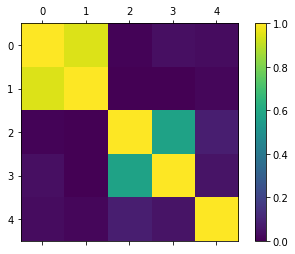

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

## TFIDF Vectorizer
<li> eliminate stop words : stop_words="english"
<li> ngram (1,1) 
<li> max_features = 10

In [58]:
f = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, stop_words="english", analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=20)
Xi = f.fit_transform(docs)

## Create a DataFrame based on the documents' TFIDF Vectorizer

In [59]:
tfid_df = DataFrame(Xi.A, columns=f.get_feature_names())
print (tfid_df)

       ball      bases   batting    called  countries       end  fielding  \
0  0.000000   0.000000  0.000000  0.000000   3.021651  0.000000  0.000000   
1  0.000000   0.000000  0.000000  0.000000   3.021651  0.000000  0.000000   
2  5.748872  10.437752  7.828314  3.832581   0.000000  1.916291  7.828314   
3  0.000000   0.000000  0.000000  0.000000   0.000000  3.832581  0.000000   
4  1.916291   0.000000  0.000000  1.916291   1.510826  0.000000  0.000000   

    football      game        ii     known  opposing      play    player  \
0   0.000000  0.000000  3.832581  1.916291  1.510826  0.000000  0.000000   
1   0.000000  0.000000  1.916291  0.000000  0.000000  0.000000  0.000000   
2   0.000000  5.748872  0.000000  0.000000  1.510826  1.916291  5.748872   
3   0.000000  1.916291  0.000000  0.000000  3.021651  5.748872  1.916291   
4  33.922693  0.000000  0.000000  3.832581  0.000000  0.000000  0.000000   

      rugby   runners     score       team        war      world  
0  0.000000  

## ## Convert Panda DataFrame to Matrix

In [60]:
tfid_ary = tfid_df.values
print (tfid_ary)

[[ 0.          0.          0.          0.          3.02165125  0.
   0.          0.          0.          3.83258146  1.91629073  1.51082562
   0.          0.          0.          0.          0.          0.
  13.41403512  7.66516293]
 [ 0.          0.          0.          0.          3.02165125  0.
   0.          0.          0.          1.91629073  0.          0.
   0.          0.          0.          0.          0.          0.
  11.49774439 11.49774439]
 [ 5.7488722  10.43775165  7.82831374  3.83258146  0.          1.91629073
   7.82831374  0.          5.7488722   0.          0.          1.51082562
   1.91629073  5.7488722   0.          7.82831374  1.51082562 10.57577937
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          3.83258146
   0.          0.          1.91629073  0.          0.          3.02165125
   5.7488722   1.91629073  0.          0.          1.51082562  4.53247687
   0.          0.        ]
 [ 1.91629073  0.          0.          1.916

## Cosine Similarity for Vector Space Models

In [61]:
correlation= 1-pairwise_distances(tfid_ary, metric='cosine')
print (correlation)

[[1.         0.94883028 0.00604906 0.02986471 0.02063385]
 [0.94883028 1.         0.         0.         0.00778381]
 [0.00604906 0.         1.         0.44297024 0.04514087]
 [0.02986471 0.         0.44297024 1.         0.02778187]
 [0.02063385 0.00778381 0.04514087 0.02778187 1.        ]]


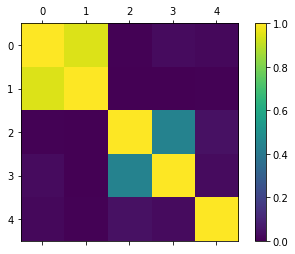

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

# Question 
#### Step 1) Read the following articles using Beautifulsoup Python library provided to you
#### Step 2) Using the above code build the Cosine Similarity Matrix using CountVectorizer and TFIDFVectorizer 
#### Step 3) Plot Similarity Matrix using CountVectorizer and TFIDFVectorizer 

##### URLs:
<li> https://en.wikipedia.org/wiki/World_War_II
<li> https://en.wikipedia.org/wiki/World_War_I 
<li> https://en.wikipedia.org/wiki/War_of_1812
<li> https://en.wikipedia.org/wiki/Basketball
<li> https://en.wikipedia.org/wiki/Association_football